## Geometric median pixel composite mosaics

In [1]:
%cd ~/hdstats

/home/251/dxr251/hdstats


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import hdstats
import joblib

In [3]:
ds = joblib.load('data/6mp63x30.pkl.xz')

In [4]:
times, data = ds

In [5]:
data.shape

(1024, 976, 10, 111)

In [6]:
gm = hdstats.nangeomedian_pcm(data, num_threads=28)

In [7]:
gm.shape

(1024, 976, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf.
  UserWarning)


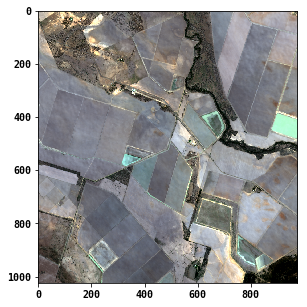

In [8]:
img = gm[:,:,[2,1,0]].copy()
for i in range(img.shape[-1]):
    dd=img[:,:,i]
    mu = np.mean(dd)
    sd = np.std(dd)
    pl, pu = mu - 3*sd, mu + 3*sd
    dd[dd<pl], dd[dd>pu] = pl, pu
    dd -= pl
    dd /= (pu - pl)
plt.figure(figsize=(5,5))
plt.imshow(img)